Arquivo encontrado em: C:\Users\gusta\Desktop\ANALISES - PYTHON\SALES.CSV\sales_data_sample.csv
Arquivo carregado com sucesso!
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY

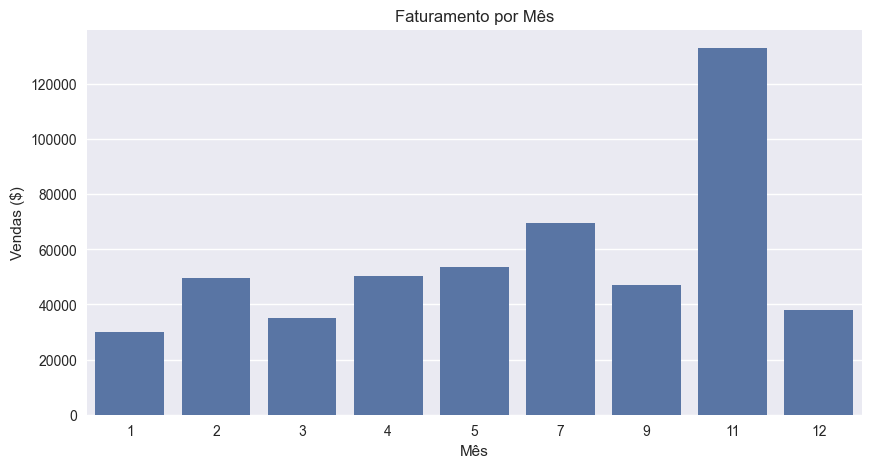

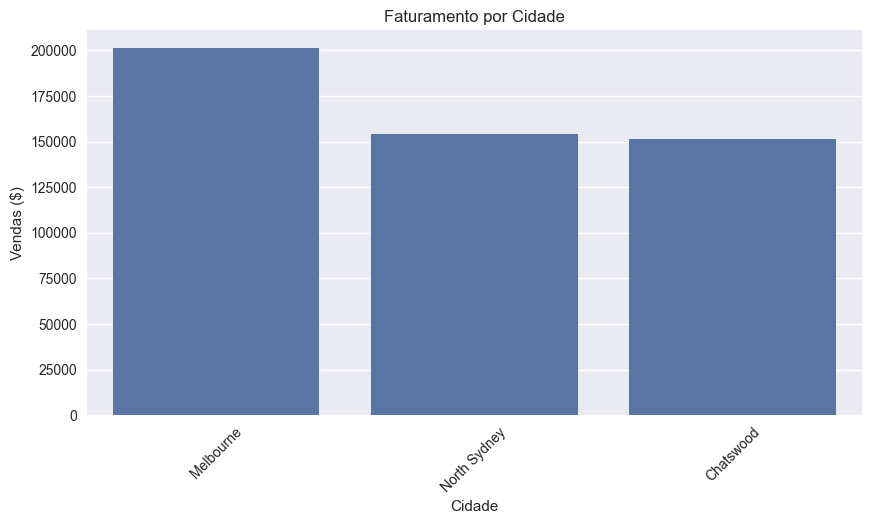

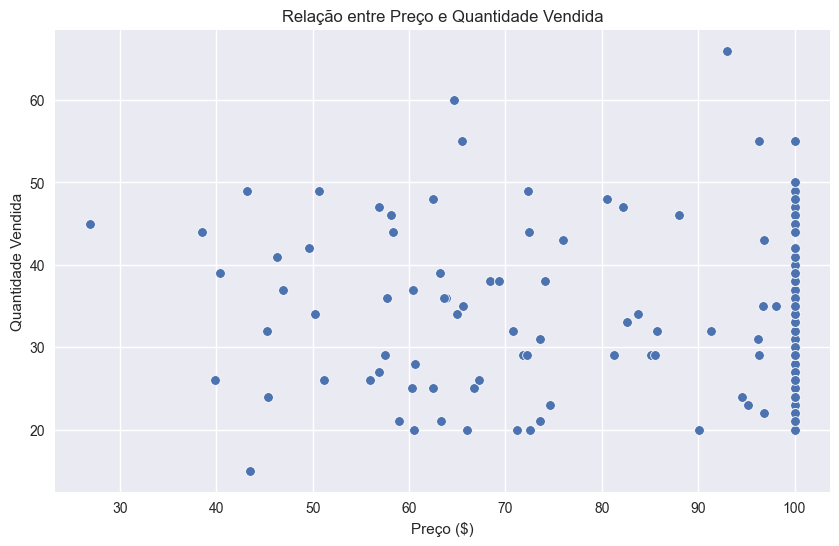

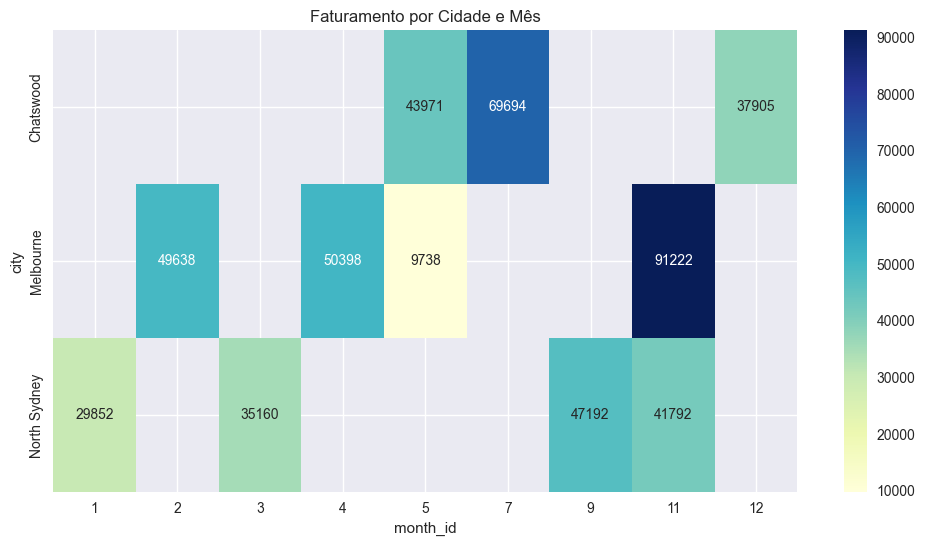

In [ ]:
import os
import pandas as pd


nome_arquivo = "sales_data_sample.csv"


pasta_inicial = r"C:\Users\gusta\Desktop\ANALISES - PYTHON"


caminho_encontrado = None

for raiz, diretorios, arquivos in os.walk(pasta_inicial):
    if nome_arquivo in arquivos:
        caminho_encontrado = os.path.join(raiz, nome_arquivo)
        break  

if caminho_encontrado:
    print(f"Arquivo encontrado em: {caminho_encontrado}")
    try:
       
        df = pd.read_csv(caminho_encontrado)
    except UnicodeDecodeError:
        
        df = pd.read_csv(caminho_encontrado, encoding='latin1')
    print("Arquivo carregado com sucesso!")
    print(df.head())
else:
    print(f"Arquivo {nome_arquivo} não encontrado em {pasta_inicial} ou subpastas.")

plt.style.use('seaborn-v0_8')
sns.set_palette('deep')


print(df.head())

# ==============================================
# Etapa 2: Limpeza e preparação dos dados
# ==============================================

# Verificar dados ausentes
print("Dados ausentes por coluna:")
print(df.isnull().sum())

# Remover linhas nulas
df = df.dropna()

print(df.columns)
# Corrigir tipo de data
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Limpar e padronizar nomes das colunas
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)

print("Colunas após limpeza:")
print(df.columns)

vendas_mes = df.groupby('month_id')['sales'].sum()

plt.figure(figsize=(10,5))
sns.barplot(x=vendas_mes.index, y=vendas_mes.values)
plt.title('Faturamento por Mês')
plt.xlabel('Mês')
plt.ylabel('Vendas ($)')
plt.show()

vendas_cidade = df.groupby('city')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=vendas_cidade.index, y=vendas_cidade.values)
plt.title('Faturamento por Cidade')
plt.xticks(rotation=45)
plt.xlabel('Cidade')
plt.ylabel('Vendas ($)')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='priceeach', y='quantityordered', data=df)
plt.title('Relação entre Preço e Quantidade Vendida')
plt.xlabel('Preço ($)')
plt.ylabel('Quantidade Vendida')
plt.show()

vendas_mes_cidade = df.pivot_table(index='city', columns='month_id', values='sales', aggfunc='sum')

plt.figure(figsize=(12,6))
sns.heatmap(vendas_mes_cidade, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Faturamento por Cidade e Mês')
plt.show()
